<a href="https://www.kaggle.com/code/yunusemreturkoglu/ab-testing-anova?scriptVersionId=144892868" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

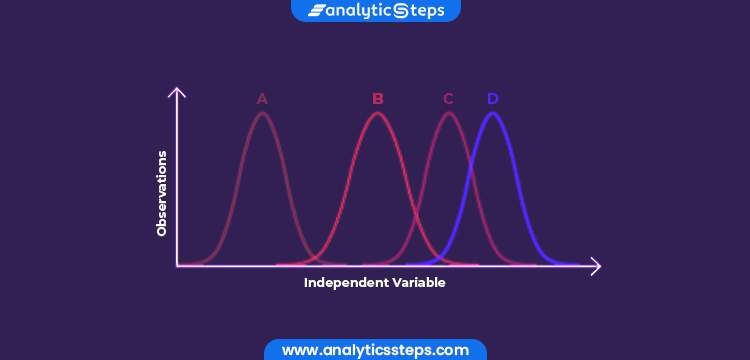

# <span style="font-family:cursive;">WHAT IS THE ANOVA(Analysis of Variance) ? </span>

ANOVA (Analysis of Variance) is a statistical test used to compare the means of two or more groups to determine if there is a significant difference between them. ANOVA analyzes the variation within each group and compares it to the variation between the groups.

The ANOVA test is based on the null hypothesis that there is no significant difference between the means of the groups being compared. The test calculates a statistical value called the F-statistic, which is the ratio of the variance between the groups to the variance within the groups. If the F-statistic is large enough and the p-value is small enough (usually set to 0.05 or less), then we reject the null hypothesis and conclude that there is a significant difference between the means of the groups.

ANOVA is widely used in various fields such as social sciences, biology, engineering, and business to compare means of different groups and to identify factors that may affect the variation between them.

## <span style="font-family:Broadway;">**Description of the Dataset**</span>
A fast-food chain plans to add a new item to its menu. However, they are still undecided between three possiblemarketing campaigns for promoting the new product. In order to determine which promotion has the greatest effect on sales,the new item is introduced at locations in several randomly selected markets. A different promotion is used at each location and the weekly sales of the new item are recorded for the first four weeks

**Columns** </br>
 **MarketID**: unique identifier for market</br>
 **MarketSize**: size of market area by sales</br>
 **LocationID**: unique identifier for store location</br>
 **AgeOfStore**: age of store in years</br>
 **Promotion**: one of three promotions that were tested</br>
 **week**: one of four weeks when the promotions were run</br>
 **SalesInThousands**: sales amount for a specific LocationID, Promotion, and week</br>


In [ ]:
# Libraries
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# !pip install statsmodels
import statsmodels.stats.api as sms
from scipy.stats import ttest_1samp, shapiro, levene, ttest_ind, mannwhitneyu, \
    pearsonr, spearmanr, kendalltau, f_oneway, kruskal
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.multicomp import MultiComparison


In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.set_option('display.width', 500)
df = pd.read_csv("/kaggle/input/fast-food-marketing-campaign-ab-test/WA_Marketing-Campaign.csv")
df.head()

In [ ]:
def check_df(dataframe, head = 5):
    print("############## Shape ##############")
    print(dataframe.shape)
    print("############## Types ##############")
    print(dataframe.dtypes)
    print("############## Head ##############")
    print(dataframe.head(head))
    print("############## Tail ##############")
    print(dataframe.tail(head))
    print("############## NA ##############")
    print(dataframe.isnull().sum())
    print("############## Quantiles ##############")
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df)

In [ ]:
# Let's Analyse Sales on the diffracture of Promotion
df.groupby("Promotion").agg({"SalesInThousands": ["mean", "count", "sum"]})

In [ ]:
# Let's Analyse Sales on the diffracture of Promotion and Marketsize
df.groupby(["MarketSize","Promotion"]).agg({"SalesInThousands":["count", "mean", "sum"]})

In [ ]:
# Let's see some graphs
sns.jointplot(x = "Promotion", y = "SalesInThousands", data = df, kind = "reg");

In [ ]:
fig , axs = plt.subplots(1,3,figsize=(15,5))

qqplot(np.array(df.loc[(df["Promotion"] == 1), "SalesInThousands"]), line="s", ax=axs[0])
qqplot(np.array(df.loc[(df["Promotion"] == 2), "SalesInThousands"]), line="s", ax=axs[1])
qqplot(np.array(df.loc[(df["Promotion"] == 3), "SalesInThousands"]), line="s", ax=axs[2])

axs[0].set_title("Promotion 1")
axs[1].set_title("Promotion 2")
axs[2].set_title("Promotion 3")
plt.show()

In [ ]:
df.groupby(["Promotion", "MarketSize"]).agg({"SalesInThousands": "mean"}).plot(kind = "pie", autopct = '%1.1f%%', subplots=True);

**ANOVA(Analysis of Variance) TEST**
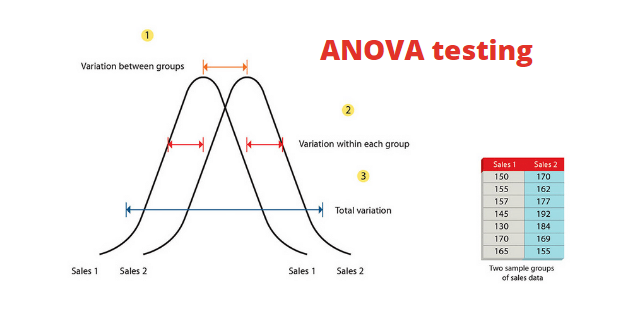

**Hypothesis Formulation**</br>
H0: M1 = M2 = M3 -> There isnot a statistically significant difference between Sales of he Promotions</br>
H1: M1 != M2 != M3 -> There is a statistically significant difference between Sales of he Promotions</br>

In [ ]:
# Normality Assumption - Shapiro Wilk

# H0: The normality assumption is met.
# H1: The normality assumption is not met.

for group in list(df["Promotion"].unique()):
    pvalue = shapiro(df.loc[df["Promotion"] == group, "SalesInThousands"])[1]
    print(group, 'p-value: %.4f' % pvalue)
    
# P-value < 0.05 H0 is rejected. normality assumption is not met.

In [ ]:
# Variance Homogeneity - Levene

# H0 = The variance homogeneity is met.
# H1 = The variance homogeneity is not met.

test_stat, pvalue = levene(df.loc[df['Promotion'] == 1, "SalesInThousands"],
                           df.loc[df['Promotion'] == 2, "SalesInThousands"],
                           df.loc[df['Promotion'] == 3, "SalesInThousands"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

# P-value > 0.05 H0 is not rejected. The variances are homogenous

In [ ]:
# I decided to apply Non-parametric Anova Test

kruskal(df.loc[df['Promotion'] == 1, "SalesInThousands"],
               df.loc[df['Promotion'] == 2, "SalesInThousands"],
               df.loc[df['Promotion'] == 3, "SalesInThousands"])



In [ ]:
# Let's see pvalue more mathematical form to understand better
test_stat, pvalue = kruskal(df.loc[df['Promotion'] == 1, "SalesInThousands"],
                            df.loc[df['Promotion'] == 2, "SalesInThousands"],
                            df.loc[df['Promotion'] == 3, "SalesInThousands"])

print("pvalue: ", "%.3f" % pvalue)

# p_value > 0.05 is rejected. There is a statistically significant difference between Promotions

In [ ]:
# There is a meaningful difference, but which one. We need to look at that.
comparison = MultiComparison(df["SalesInThousands"], df["Promotion"])
tukey = comparison.tukeyhsd(0.05)
print(tukey.summary())

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
Thank you for supports and comments.✌️✌🏿
    </br>
You can follow me </br>
linkedin: <a href="https://www.linkedin.com/in/yunus-emre-turkoglu-89804b193/" target="_blank"><font color=white>Visit My Profile</font></a>

</p>
</div>
